# Motorcycle Mircomorts

In this notebook, we'll simulate the motorcycle micromort question. The shape of the numerical answer will give you a hint for what the analytical answer will be. You might be surprised how easy it is, in the end.

You can either run this in binder
https://mybinder.org/v2/gh/JonasRademacker/JupyterNotebooksForTeachingMath/master?filepath=MotorcycleMicromorts.ipynb , 

or - much, much better, although a bit hasslesome the first time you set it up - you can run it on your own computer. To do that:

1) Download and install anaconda (https://www.anaconda.com/). 

2) Download this file from github. Do so by clicking on "Raw", and then asking your browser to save the file (in Firefox: File -> Save Pages As...)

Alternatively, you can download the entire github repository. Open a terminal window. Go to the directory where you want a copy of this github repository to live on your computer. Then execute the command:

git clone https://github.com/JonasRademacker/JupyterNotebooksForTeachingMath.git

(alternatively, go to https://github.com/JonasRademacker/JupyterNotebooksForTeachingMath and find the green "Code" button and take it from there)

3) Open a terminal window, go to the directory where this file is, and type: jupyter notebook

This file should now open in your browser (again), and you can edit it and execute and save the code.

Remember, to excecute each field, do shift+return. Execute the fields in order. If things got messy, go to Kernel and select Restart and Clear all output - and start Shift+Return from the top.

First import some libraries

In [1]:
from math import *
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Before we start, let's initialise the random number generator. Change the seed to get different outcomes for (peudo)random numbers used in this sheet.

In [2]:
np.random.seed(650)

Our strategy will be to move through my motorcycle journey in 6 mile steps - each step corresponds to one micromort, i.e. a probability of a fatal accident of $10^{-6}$.

In [3]:
def Travel(MaxMiles):
    stepsize               = 6.0    
    steps                  = int(MaxMiles/stepsize)    
    probOfAccidentEachStep = 1.e-6

    for i in range(steps):
        if np.random.random() < probOfAccidentEachStep: # deadly accident happened in this step
            return (i+0.5)*stepsize    # we don't know where in the 6 mile stretch - take the middle.
        
    return -999                        # return a negative number if motorcyclist survived entire journey.

made_it_to_mile = Travel(1.e8)
print("deadly accident after ", made_it_to_mile, "miles")

deadly accident after  4029801.0 miles


Let's repeat this experiment for multiple clones of myself and see if and when they have a fatal accident. First define some functions:

In [11]:
def MultipleTrips(NumMotorCyclists, MaxMiles):
    lastMileArray = np.zeros(NumMotorCyclists)
    for i in range(NumMotorCyclists):
        lastMileArray[i]=Travel(MaxMiles)
    return lastMileArray

def plotLastMiles(lastMileArray, MaxMiles):
    nbins = np.count_nonzero(lastMileArray>0)//50    # this gives on average 50 entries per bin.
    # Note: a//b is integer devision, so e.g. 12//5=2, in contrast to a/b, which returns a float, so 12/5=2.4
    if nbins < 10: 
        nbins=10
    h=plt.hist(lastMileArray, nbins, range=(0, int(MaxMiles)))
    plt.show()

Now let's use the above functions to simulate 100 clones going on a 6 million mile m/c journey, and plot the results.

38 of the 100 simulated motorcyling clones, survivived the 6000000.0 miles journey.


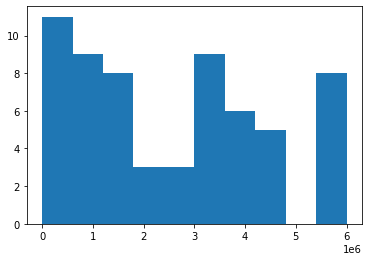

In [13]:
NumMC=100
MaxM =6.0e6
LMArray = MultipleTrips(NumMC, MaxM)
print(np.count_nonzero(LMArray<0), "of the", NumMC, "simulated motorcyling clones, survivived the", MaxM, "miles journey.")
plotLastMiles(LMArray, MaxM)

Note, importantly, that several of my simulated motorcycling clones survive this journey. So the probability of a fatal accident in 6 million miles is not 1 (and for 60 millions miles, it is obviously not 10), even though the sum of micromorts is 1 (or 10). So, something quite literally does not add up.

BTW, you will have noticed that this code is painfully slow - and to have a smooth distribution you'd want to change NumMC to something much larger, which will take even longer. Below I provide some faster code, which does exactly the same thing - but it has the disadvantage that this is harder to understand and will be more difficult for you to modify. I'd suggest you first convince yourself that you understand the code above, but then use the code below.

Final remark: a 6 million mile journey would take more than 11 years constant riding at an average speed of 60mph, without stopping for food, sleep, ...

## Task:
Play with the numbers - e.g. increase or decrease the number of miles. And if you have sufficient patience, increase the number of motorcylists.

## Faster, logically identical (but less intuitive) code:

In [8]:
## the code below does exactly the same as the code above, but much faster.
## The price for this improvement is that is that it is a bit counter-intuitive.
def FasterTravel(MaxMiles):
    stepsize               = 6.0    
    steps                  = int(MaxMiles/stepsize)    
    probOfAccidentEachStep = 1.e-6

    batchsize=1000
    for i in range(steps//batchsize + 1):
        accidents=np.where(np.random.random(batchsize)< probOfAccidentEachStep)
        if len(accidents[0]) > 0:
            miles = (i*batchsize + accidents[0][0]+0.5)*stepsize
            if miles <= MaxMiles: return miles
            
    return -999  # return a negative number if motorcyclist survived entire journey.

made_it_to_mile = FasterTravel(1.e8)
print("deadly accident after ", made_it_to_mile, "miles")

deadly accident after  1956711.0 miles


In [9]:
def FasterMultipleTrips(NumMotorCyclists, MaxMiles):
    lastMileArray = np.zeros(NumMotorCyclists)
    for i in range(NumMotorCyclists):
        lastMileArray[i]=FasterTravel(MaxMiles)
    return lastMileArray

9750 of the 10000 simulated motorcycling clones survivived the 150000.0 miles journey.


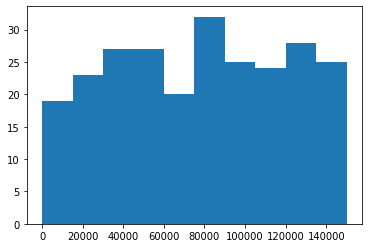

BTW, here (and in general for sufficiently short journeys), you should find that the naive approximation P(deadly accident) = miles/6 * 1/1,000,000 works well.
Compare:  0.024999999999999998 , 0.025


In [12]:
NumMC=10000
MaxM =150e3
LMArray = FasterMultipleTrips(NumMC, MaxM)
print(np.count_nonzero(LMArray<0), "of the"
      , NumMC, "simulated motorcycling clones survivived the"
      , MaxM, "miles journey.")
plotLastMiles(LMArray, MaxM)
print("BTW, here (and in general for sufficiently short journeys),",
      "you should find that the naive approximation P(deadly accident) = miles/6 * 1/1,000,000 works well.")
print("Compare: ", MaxM/6*1.e-6, ",", np.count_nonzero(LMArray>0)/len(LMArray))

383 of the 1000 simulated motorcycling clones survivived the 6000000.0 miles journey.


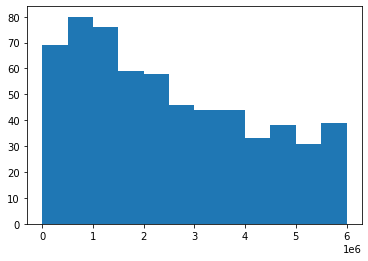

In [17]:
NumMC=1000
MaxM =6.0e6
LMArray = FasterMultipleTrips(NumMC, MaxM)
print(np.count_nonzero(LMArray<0), "of the"
      , NumMC, "simulated motorcycling clones survivived the"
      , MaxM, "miles journey.")
plotLastMiles(LMArray, MaxM)

137 of the 1000 simulated motorcycling clones survivived the 12000000.0 miles journey.


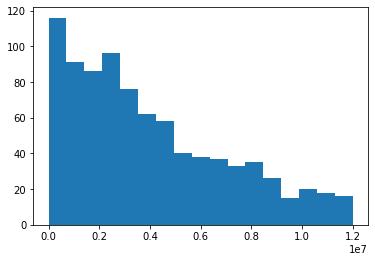

In [18]:
NumMC=1000
MaxM =12.0e6
LMArray = FasterMultipleTrips(NumMC, MaxM)
print(np.count_nonzero(LMArray<0), "of the", NumMC
      , "simulated motorcycling clones survivived the", MaxM
      , "miles journey.")
plotLastMiles(LMArray, MaxM)

4 of the 40000 simulated motorcycling clones survivived the 60000000.0 miles journey 
(which, btw, would have taken 114 years at 60mph).


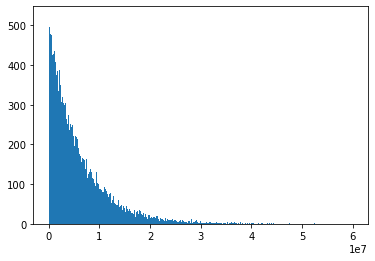

In [19]:
NumMC=40000 # even with the faster code, this will take long to run with 40,000 clones;
MaxM =60.0e6
LMArray = FasterMultipleTrips(NumMC, MaxM)
print(np.count_nonzero(LMArray<0), "of the"
      , NumMC, "simulated motorcycling clones survivived the"
      , MaxM, "miles journey"
      , "\n(which, btw, would have taken", int(MaxM/(60*24*365)), "years at 60mph).")
plotLastMiles(LMArray, MaxM)